<a href="https://colab.research.google.com/github/Xenu47/mo_cw/blob/main/%D0%A1%D1%82%D0%BE%D1%80%D0%BE%D0%B6%D1%83%D0%BA_%D0%90%D0%BD%D1%82%D0%BE%D0%BD%2C_%D0%9A%D0%9C_83%2C_%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# **Сторожук Антон, КМ-83. Дослідження збіжності метода Хука-Дживса**

## Зміст

* Зміст
* Постановка задачі
* Теоретичні відомості 
* Вирішення задачі
  * Імпорт бібліотек
  * Створення функцій
  * Задання констант
  * Виконання розрахунків
* Виведення результатів
* Висновки
* Корисні посилання 



## Постановка задачі

Дослідити збіжність метода Хука-Дживса при мінімізації функції Розенброка в залежності від:
1. Значення початкового кроку $\|\Delta x\|$.
2. Параметрів методу.
3. Вигляду критерію закінчення (
$\begin{cases}
\frac{\|x^{k+1}-x^k\|}{\|x^k\|} &\leq \epsilon \\
|f(x^{k+1}) - f(x^k)| &\leq \epsilon \\ 
\end{cases}$
або $\|\Delta x\| \leq \epsilon$).
4. Модифікацій методу.

## Теоретичні відомості

### Функція Розенброка

Функція Розенброка, є класичною тестовою функцією в теорії оптимізації. Іноді її називають функцією банана Розенброка через форму її контурних ліній. Глобальний мінімум знаходиться в точці (1,1), яка лежить у довгій вузькій долині.

Тестова функція Розенброка, яка використовується при дослідженні методів для
вирішення задач безумовної оптимізації:

$f(x_1, x_2) = 100(x_2-x_1^2)^2 + (1-x_2)^2; x^{(0)}=(-1,2;0,0)$

### Метод Хука–Дживса

Метод Хука–Дживса (англ. Hooke — Jeeves) або пошук за зразком (англ. Pattern search) так само, як і метод Нелдера–Міда, призначений для пошуку безумовного локального екстремуму функції і відноситься до прямих методів, тобто спирається безпосередньо на значення функції.

Переваги алгоритму:
* властивість «прискорюватися», що сприяє підвищенню його загальної ефективності
* можливість отримання за його допомогою наближеного рішення, якість якого безупинно підвищується на всіх стадіях чисельного рішення
* проста стратегія пошуку і невеликий обсяг необхідної пам'яті

Недоліки алгоритму:
* алгоритм заснований на циклічному русі по координатам, що може привести до виродження алгоритму в нескінченну послідовність пошуків через дослідження без пошуку за зразком
* іноді розв'язком може стати локальний мінімум, а не глобальний, якщо на досліджуваній області присутні кілька мінімумів

Алгоритм складається з двох фаз:
* Досліджуючий пошук - орієнтований на виявлення характеру локальної поведінки цільової функції та визначення нарямку уздовж «ярів».
* Пошук по зразку - використовує інформацію, одержану після проведення досліджуючого пошуку для руху по «ярам».

![xp.png](https://drive.google.com/uc?id=1_Tb_FxUptKw5tej2O3T3MezJnDpXifaH)

Якщо значення функції в новій точці менше за значення функції в минулій точці, знайденій по зразку то застосовується зменшення значень вектора приросуту:

![delta.png](https://drive.google.com/uc?id=1JVSr8LU0vyB-BUxjGKbNVSfJY08O9kU9)

Графіки:

![graph.png](https://drive.google.com/uc?id=1Uj9hVDb0M-HLKMQpqsE7t7FG9CWuHDbF)



## Вирішення задачі

### Імпорт бібліотек

In [ ]:
from sympy import symbols, Eq, N
from sympy.solvers import solve
import numpy as np
import math
from IPython.display import Markdown
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

### Створення функцій

In [ ]:
#@title Значення функції в точці
def f(x):
    result = function.subs([(x1, x[0]), (x2, x[1])])
    return N(result, 3)

In [ ]:
#@title Досліджуючий пошук
def exploratory_search(x, delta_x, list_of_x, silent=False):
    sign = '+'
    f_x = f(x)
    xi, di, ki = symbols('xi di ki')
    eq = xi + di*(ki)
    new_x = x.copy()
    new_f_x = list()
    index = len(list_of_x)
    for i in range(2):
        for j in range(2):
            plus_minus = ((-1)**(2*i+j))
            eq_result = eq.subs(xi, x[i]).subs(di, delta_x[i]).subs(ki, plus_minus) # x[i] +- delta[i]
            res = N( eq_result, 3)
            new_x[i] = res
            func = f(new_x)
            new_f_x.append(func)
            if not silent:
                display(Markdown(rf'$ x_{i+1}^{index} = {x[i]} {"+" if plus_minus>0 else "-"} {delta_x[i]} = {N(res, 3)}; f({new_x}) = {func} {"<" if func<f_x else ">"} {f_x}$'))
        if new_f_x[2*i] < f_x:
            new_x[i] = N(new_x[i] + 2*delta_x[i], 3)
    list_of_x.append(new_x)
    return new_x

In [ ]:
#@title Пошук по зразку
def get_xp(list_of_x):
    x_current = list_of_x[-1]
    x_last = list_of_x[-2]
    xp = [2*x_current[i] - x_last[i] for i in range(2)]
    return [N(q, 3) for q in xp]

In [ ]:
#@title Метод Хука-Дживса з покроковим текстовим виводом
def solve_hooke_jeeves(function, x_0, base_delta_x, epsilon, cond):
    list_of_x = [x_0]
    list_of_x_back = list()
    delta_x = base_delta_x.copy()
    bonus=0

    display(Markdown(rf'Мінімізувати функцію: ${str(function).replace("**", "^").replace("x", "x_")}$'))
    display(Markdown(rf'Початкова точка: $x^0 = {x_0}$'))
    display(Markdown(rf'Значення приросту: $\Delta x = {base_delta_x}$'))
    display(Markdown(rf'Значення функції: $f(x^0) = {f(x_0)}$'))
    print()


    display(Markdown(rf'Ітерація 1:'))
    display(Markdown(r'Проводиться досліджуючий пошук навколо першої базисної точки $x^0$'))
    x_1 = exploratory_search(x_0, delta_x, list_of_x)
    xp = get_xp(list_of_x)

    display(Markdown(rf'Отримана точка $x^1 = {x_1}$'))
    display(Markdown(rf'$x_0 = {list_of_x[-2]}$ - базисна'))
    display(Markdown(rf'$x_1 = {x_1}$ - поточна базисна'))
    display(Markdown(rf'$x_p^1 = 2x^1 - x^0 = {xp}$'))
    display(Markdown(rf'$f(x_p^1) = {f(xp)}$'))
    print('\n')

    i = 0
    exit_cond_1 = np.linalg.norm(delta_x) <= epsilon
    first_cond = np.linalg.norm(np.array(np.subtract(list_of_x[-1],list_of_x[-2]), dtype=np.float64))/np.linalg.norm(np.array(list_of_x[-2], dtype=np.float64)) <= epsilon
    second_cond = np.absolute(f(list_of_x[-1]) - f(list_of_x[-2])) <= epsilon
    exit_cond_2 = first_cond and second_cond
    exit_cond = exit_cond_1 if cond == 1 else exit_cond_2
    while not exit_cond:
        i+=1
        
        xn = exploratory_search(xp, delta_x, list_of_x)
        display(Markdown(rf'Ітерація {i+1+bonus}:'))
        display(Markdown(rf'Проводиться досліджуючий пошук навколо точки $x_p^{i}$'))
        display(Markdown(rf'Отримана точка $x^{i+1} = {xn}$'))

        exit_cond_1 = np.linalg.norm(delta_x) <= epsilon
        first_cond = np.linalg.norm(np.array(np.subtract(list_of_x[-1],list_of_x[-2]), dtype=np.float64))/np.linalg.norm(np.array(list_of_x[-2], dtype=np.float64)) <= epsilon
        second_cond = np.absolute(f(list_of_x[-1]) - f(list_of_x[-2])) <= epsilon
        exit_cond_2 = first_cond and second_cond
        exit_cond = exit_cond_1 if cond == 1 else exit_cond_2


        if f(list_of_x[-1]) < f(list_of_x[-2]):
            xp = get_xp(list_of_x)

            display(Markdown(rf'Оскільки $f({list_of_x[-1]}) = {f(list_of_x[-1])} < f({list_of_x[-2]}) = {f(list_of_x[-2])}$ $\Rightarrow$'))
            display(Markdown(rf'$x_{i} = {list_of_x[-2]}$ - базисна'))
            display(Markdown(rf'$x_{i+1} = {xn}$ - поточна базисна'))
            if exit_cond:
                break
            display(Markdown(rf'З поточної базисної точки $x^{i+1}$ проводиться пошук за зразком:'))
            display(Markdown(rf'$x_p^{i+1} = 2x^{i+1} - x^{i} = {xp}$'))
            display(Markdown(rf'$f(x_p^{i+1}) = {f(xp)}$'))
        
        else:
            delta_x = [x/2 for x in delta_x]
            
            display(Markdown(rf'**Оскільки** $f({list_of_x[-1]}) = {f(list_of_x[-1])} > f({list_of_x[-2]}) = {f(list_of_x[-2])}$ $\Rightarrow$'))
            display(Markdown(rf'Пошук не є успішним, необхідно зменшити значення приросту:'))
            display(Markdown(r'$\Delta x_{new} = \frac{\Delta x_{last}}{2} =$'+rf'{delta_x}'))
            display(Markdown(rf'І провести досліджуючий пошук навколо останньої базисної точки $x^{i-1} = {list_of_x[-3]}$'))
            print('\n')
            
            list_of_x_back = list_of_x.copy()
            list_of_x = list_of_x[:-2]
            i = i-2
            bonus = 2
            xp = list_of_x[-1]
            continue
        
        print('\n')
    return list_of_x[-1]

In [ ]:
#@title Метод Хука-Дживса без покрокового текстового виводу
#@markdown Ідентичній попередньому, але без тексту
def solve_hooke_jeeves_silent(function, x_0, base_delta_x, epsilon, cond):
    list_of_x = [x_0]
    list_of_x_back = list()
    delta_x = base_delta_x.copy()
    bonus=0

    x_1 = exploratory_search(x_0, delta_x, list_of_x, True)
    xp = get_xp(list_of_x)

    i = 0
    exit_cond_1 = np.linalg.norm(delta_x) <= epsilon
    first_cond = np.linalg.norm(np.array(np.subtract(list_of_x[-1],list_of_x[-2]), dtype=np.float64))/np.linalg.norm(np.array(list_of_x[-2], dtype=np.float64)) <= epsilon
    second_cond = np.absolute(f(list_of_x[-1]) - f(list_of_x[-2])) <= epsilon
    exit_cond_2 = first_cond and second_cond
    exit_cond = exit_cond_1 if cond == 1 else exit_cond_2
    while not exit_cond:
        i+=1
        
        xn = exploratory_search(xp, delta_x, list_of_x, True)

        exit_cond_1 = np.linalg.norm(delta_x) <= epsilon
        first_cond = np.linalg.norm(np.array(np.subtract(list_of_x[-1],list_of_x[-2]), dtype=np.float64))/np.linalg.norm(np.array(list_of_x[-2], dtype=np.float64)) <= epsilon
        second_cond = np.absolute(f(list_of_x[-1]) - f(list_of_x[-2])) <= epsilon
        exit_cond_2 = first_cond and second_cond
        exit_cond = exit_cond_1 if cond == 1 else exit_cond_2
        
        if f(list_of_x[-1]) < f(list_of_x[-2]):
            xp = get_xp(list_of_x)
            if exit_cond:
                break
        else:
            delta_x = [x/2 for x in delta_x]
            list_of_x_back = list_of_x.copy()
            list_of_x = list_of_x[:-2]
            i = i-2
            bonus = 2
            xp = list_of_x[-1]
            continue
    return list_of_x[-1]

In [ ]:
#@title Задання констант
x1, x2 = symbols('x1 x2')
function = (x1-2)**2 + x2**2
x_0 = [4,6]
base_delta_x = [0.6,0.8]
epsilon = 0.5
exit_condition = 1 # 1 == ||delta x|| <= epsilon

In [ ]:
#@title Виконання розрахунків + виведення результатів
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

solve_hooke_jeeves(function, x_0, base_delta_x, epsilon, exit_condition)

<IPython.core.display.Javascript object>

Мінімізувати функцію: $x_2^2 + (x_1 - 2)^2$

Початкова точка: $x^0 = [4, 6]$

Значення приросту: $\Delta x = [0.6, 0.8]$

Значення функції: $f(x^0) = 40.0$

Ітерація 1:

Проводиться досліджуючий пошук навколо першої базисної точки $x^0$

$ x_1^1 = 4 + 0.6 = 4.60; f([4.60, 6]) = 42.8 > 40.0$

$ x_1^1 = 4 - 0.6 = 3.40; f([3.40, 6]) = 38.0 < 40.0$

$ x_2^1 = 6 + 0.8 = 6.80; f([3.40, 6.80]) = 48.2 > 40.0$

$ x_2^1 = 6 - 0.8 = 5.20; f([3.40, 5.20]) = 29.0 < 40.0$

Отримана точка $x^1 = [3.40, 5.20]$

$x_0 = [4, 6]$ - базисна

$x_1 = [3.40, 5.20]$ - поточна базисна

$x_p^1 = 2x^1 - x^0 = [2.80, 4.40]$

$f(x_p^1) = 20.0$

$ x_1^2 = 2.80 + 0.6 = 3.40; f([3.40, 4.40]) = 21.3 > 20.0$

$ x_1^2 = 2.80 - 0.6 = 2.20; f([2.20, 4.40]) = 19.4 < 20.0$

$ x_2^2 = 4.40 + 0.8 = 5.20; f([2.20, 5.20]) = 27.1 > 20.0$

$ x_2^2 = 4.40 - 0.8 = 3.60; f([2.20, 3.60]) = 13.0 < 20.0$

Ітерація 2:

Проводиться досліджуючий пошук навколо точки $x_p^1$

Отримана точка $x^2 = [2.20, 3.60]$

Оскільки $f([2.20, 3.60]) = 13.0 < f([3.40, 5.20]) = 29.0$ $\Rightarrow$

$x_1 = [3.40, 5.20]$ - базисна

$x_2 = [2.20, 3.60]$ - поточна базисна

З поточної базисної точки $x^2$ проводиться пошук за зразком:

$x_p^2 = 2x^2 - x^1 = [1.00, 2.00]$

$f(x_p^2) = 5.00$

$ x_1^3 = 1.00 + 0.6 = 1.60; f([1.60, 2.00]) = 4.16 < 5.00$

$ x_1^3 = 1.00 - 0.6 = 0.400; f([0.400, 2.00]) = 6.57 > 5.00$

$ x_2^3 = 2.00 + 0.8 = 2.80; f([1.60, 2.80]) = 8.01 > 5.00$

$ x_2^3 = 2.00 - 0.8 = 1.20; f([1.60, 1.20]) = 1.60 < 5.00$

Ітерація 3:

Проводиться досліджуючий пошук навколо точки $x_p^2$

Отримана точка $x^3 = [1.60, 1.20]$

Оскільки $f([1.60, 1.20]) = 1.60 < f([2.20, 3.60]) = 13.0$ $\Rightarrow$

$x_2 = [2.20, 3.60]$ - базисна

$x_3 = [1.60, 1.20]$ - поточна базисна

З поточної базисної точки $x^3$ проводиться пошук за зразком:

$x_p^3 = 2x^3 - x^2 = [1.00, -1.20]$

$f(x_p^3) = 2.44$

$ x_1^4 = 1.00 + 0.6 = 1.60; f([1.60, -1.20]) = 1.60 < 2.44$

$ x_1^4 = 1.00 - 0.6 = 0.400; f([0.400, -1.20]) = 4.00 > 2.44$

$ x_2^4 = -1.20 + 0.8 = -0.399; f([1.60, -0.399]) = 0.319 < 2.44$

$ x_2^4 = -1.20 - 0.8 = -2.00; f([1.60, -2.00]) = 4.16 > 2.44$

Ітерація 4:

Проводиться досліджуючий пошук навколо точки $x_p^3$

Отримана точка $x^4 = [1.60, -0.399]$

Оскільки $f([1.60, -0.399]) = 0.319 < f([1.60, 1.20]) = 1.60$ $\Rightarrow$

$x_3 = [1.60, 1.20]$ - базисна

$x_4 = [1.60, -0.399]$ - поточна базисна

З поточної базисної точки $x^4$ проводиться пошук за зразком:

$x_p^4 = 2x^4 - x^3 = [1.60, -2.00]$

$f(x_p^4) = 4.15$

$ x_1^5 = 1.60 + 0.6 = 2.20; f([2.20, -2.00]) = 4.03 < 4.15$

$ x_1^5 = 1.60 - 0.6 = 1.00; f([1.00, -2.00]) = 5.00 > 4.15$

$ x_2^5 = -2.00 + 0.8 = -1.20; f([2.20, -1.20]) = 1.48 < 4.15$

$ x_2^5 = -2.00 - 0.8 = -2.80; f([2.20, -2.80]) = 7.87 > 4.15$

Ітерація 5:

Проводиться досліджуючий пошук навколо точки $x_p^4$

Отримана точка $x^5 = [2.20, -1.20]$

**Оскільки** $f([2.20, -1.20]) = 1.48 > f([1.60, -0.399]) = 0.319$ $\Rightarrow$

Пошук не є успішним, необхідно зменшити значення приросту:

$\Delta x_{new} = \frac{\Delta x_{last}}{2} =$[0.3, 0.4]

І провести досліджуючий пошук навколо останньої базисної точки $x^3 = [1.60, 1.20]$

$ x_1^4 = 1.60 + 0.3 = 1.90; f([1.90, 1.20]) = 1.45 < 1.60$

$ x_1^4 = 1.60 - 0.3 = 1.30; f([1.30, 1.20]) = 1.93 > 1.60$

$ x_2^4 = 1.20 + 0.4 = 1.60; f([1.90, 1.60]) = 2.57 > 1.60$

$ x_2^4 = 1.20 - 0.4 = 0.801; f([1.90, 0.801]) = 0.651 < 1.60$

Ітерація 6:

Проводиться досліджуючий пошук навколо точки $x_p^3$

Отримана точка $x^4 = [1.90, 0.801]$

Оскільки $f([1.90, 0.801]) = 0.651 < f([1.60, 1.20]) = 1.60$ $\Rightarrow$

$x_3 = [1.60, 1.20]$ - базисна

$x_4 = [1.90, 0.801]$ - поточна базисна

[1.90, 0.801]

## Виведення результатів

Критерій закінчення - $\begin{cases}\frac{\|x^{k+1}-x^k\|}{\|x^k\|} &\leq \epsilon \\|f(x^{k+1}) - f(x^k)| &\leq \epsilon \\ \end{cases}$

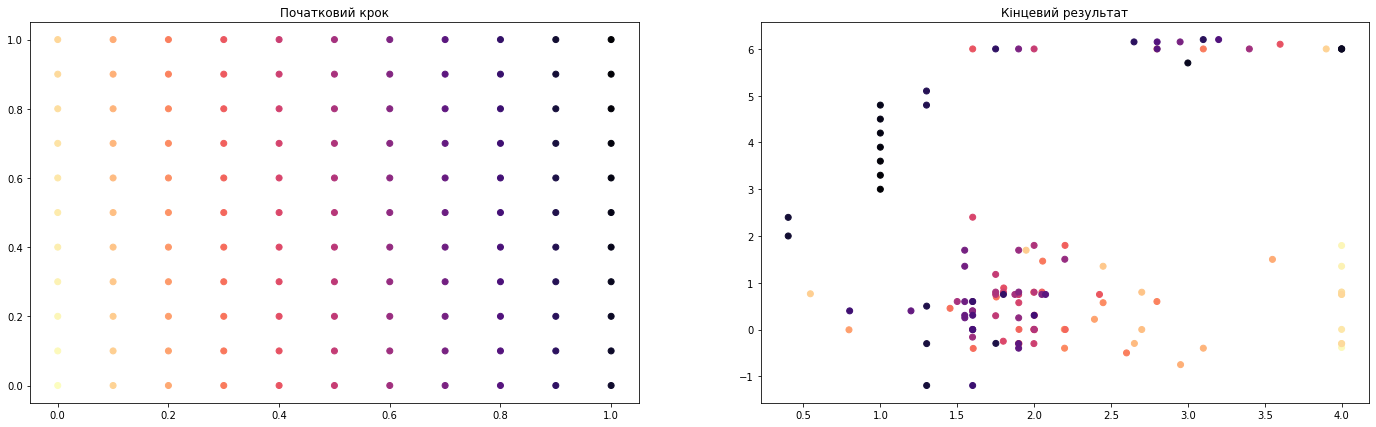

In [ ]:
#@title Графік збіжності метода Хука-Дживса при мінімізації функції Розенброка в залежності від значення почачткого кроку і критерію закінчення
display(Markdown(r'Критерій закінчення - $\begin{cases}\frac{\|x^{k+1}-x^k\|}{\|x^k\|} &\leq \epsilon \\|f(x^{k+1}) - f(x^k)| &\leq \epsilon \\ \end{cases}$'))

exit_condition = 2
values = list()
for i in range(11):
    for j in range(11):
        temp = [i/10,j/10]
        func_result = solve_hooke_jeeves_silent(function, x_0, temp, epsilon, exit_condition)
        temp.append(func_result)
        values.append(temp)

x = [x[0] for x in values]
y = [x[1] for x in values]
z = [x[2] for x in values]

fig = plt.figure(figsize=(24, 7))

color = [q for q in range(len(z))]
color.reverse()

plt.subplot(1, 2, 1)
plt.scatter(x , y, c = color, cmap ='magma')
plt.title('Початковий крок')

plt.subplot(1, 2, 2)
zx = [q[0] for q in z]
zy = [q[1] for q in z]
plt.scatter(zx , zy, c = color, cmap ='magma')
plt.title('Кінцевий результат')
plt.show()

Критерій закінчення - $\|\Delta x\| \leq \epsilon$

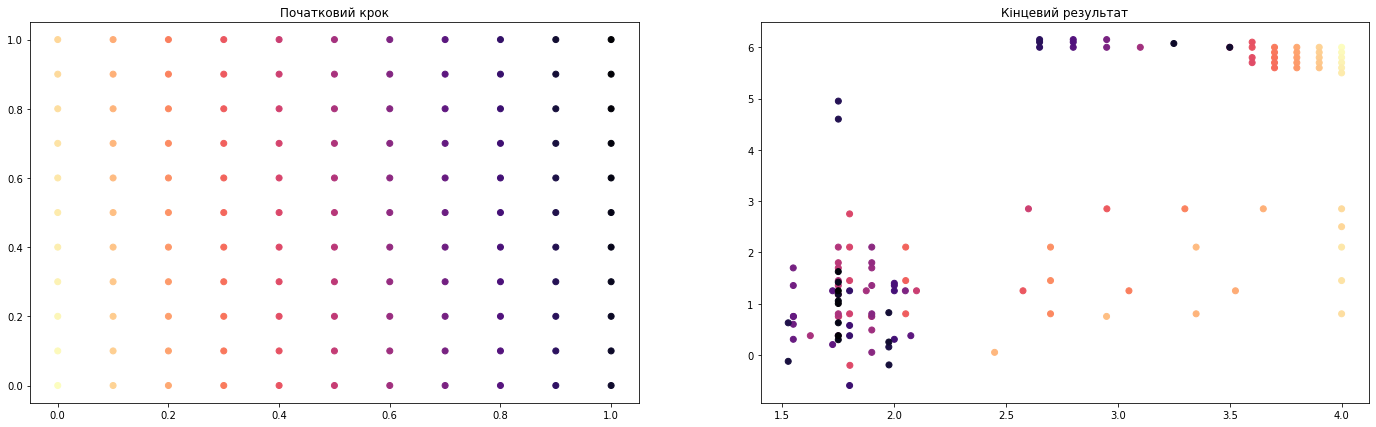

In [ ]:
#@title Графік збіжності метода Хука-Дживса при мінімізації функції Розенброка в залежності від значення почачткого кроку і критерію закінчення
display(Markdown(r'Критерій закінчення - $\|\Delta x\| \leq \epsilon$'))

exit_condition = 1
values = list()
for i in range(11):
    for j in range(11):
        temp = [i/10,j/10]
        func_result = solve_hooke_jeeves_silent(function, x_0, temp, epsilon, exit_condition)
        temp.append(func_result)
        values.append(temp)

x = [x[0] for x in values]
y = [x[1] for x in values]
z = [x[2] for x in values]

fig = plt.figure(figsize=(24, 7))

color = [q for q in range(len(z))]
color.reverse()

plt.subplot(1, 2, 1)
plt.scatter(x , y, c = color, cmap ='magma')
plt.title('Початковий крок')

plt.subplot(1, 2, 2)
zx = [q[0] for q in z]
zy = [q[1] for q in z]
plt.scatter(zx , zy, c = color, cmap ='magma')
plt.title('Кінцевий результат')
plt.show()

## Висновки

В ході даної роботи було досліджено збіжність метода Хука-Дживса при мінімізації функції Розенброка.

Також було досліджено поведінку функціх при різних критеріях закінчення і опираючись на вищевказані графіки, можна зробити висновок, що використовуючи критерій закінчення 
* $\begin{cases}\frac{\|x^{k+1}-x^k\|}{\|x^k\|} &\leq \epsilon \\|f(x^{k+1}) - f(x^k)| &\leq \epsilon \\ \end{cases}$

функція збігається до мінімуму з меншою швидкістю, ніж використовуючи критерій закінчення 
* $\|\Delta x\| \leq \epsilon$

## Список використаних джерел


1. AMO — Advanced Modeling and Optimization, Volume 11, Number 1 - Department of Mathematics and Statistics, University of Canterbury, 2009 (https://camo.ici.ro/journal/vol11/v11a4.pdf)

2. Numerical Optimization: Penn State Math 555 Lecture Notes - Christopher Griffin, 2012 (http://www.personal.psu.edu/cxg286/Math555.pdf)

3. Банди Б.,Методы оптимизации. Вводный курс. М., 1988 (https://elprivod.nmu.org.ua/files/optimization/Банди_методы%20оптимизации.pdf)

4. Методы оптимизации систем автоматизированого проектирования (http://www.optimizaciya-sapr.narod.ru)

5. Ладогубец Т.С., Методи оптимізації. Практика 2., 2021 (https://drive.google.com/file/d/1OJ0E8cCos0hXFTsM1Cvp08Hyy5KaNQq8/view?usp=sharing)

5. Ладогубец Т.С., Методи оптимізації. Лекція 4., 2021 (https://drive.google.com/file/d/1CTQGX88IPj6HRko77aHITAJ0sWO5Mtqy/view?usp=sharing)
